In [3]:
# pre-processing

import os
import random
import shutil
from sklearn.model_selection import train_test_split

# path to dataset
dataset_path = 'dataset'

# path to store the train and test data
train_path = 'train'
test_path = 'test'

# ratio for train-test split
test_size = 0.2

# creating train and test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# list of class folders
class_folders = os.listdir(dataset_path)

# splitting the dataset into train and test sets
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    images = os.listdir(class_path)
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
    
    # copying train images to the train directory
    train_class_path = os.path.join(train_path, class_folder)
    os.makedirs(train_class_path, exist_ok=True)
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(train_class_path, image)
        shutil.copy(src_path, dst_path)
    
    # copying test images to the test directory
    test_class_path = os.path.join(test_path, class_folder)
    os.makedirs(test_class_path, exist_ok=True)
    for image in test_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(test_class_path, image)
        shutil.copy(src_path, dst_path)


Found 135 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 42 images belonging to 4 classes.
Epoch 1/10
5/5 [==============================] - 22s 4s/step - loss: 4.6877 - accuracy: 0.3259 - val_loss: 3.3161 - val_accuracy: 0.4242
Epoch 2/10
5/5 [==============================] - 26s 5s/step - loss: 2.3793 - accuracy: 0.5630 - val_loss: 1.5353 - val_accuracy: 0.6364
Epoch 3/10
5/5 [==============================] - 26s 5s/step - loss: 0.8256 - accuracy: 0.7259 - val_loss: 1.1680 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 28s 6s/step - loss: 0.9014 - accuracy: 0.6593 - val_loss: 1.1604 - val_accuracy: 0.6970
Epoch 5/10
5/5 [==============================] - 26s 5s/step - loss: 0.3481 - accuracy: 0.9333 - val_loss: 0.7029 - val_accuracy: 0.7576
Epoch 6/10
5/5 [==============================] - 25s 5s/step - loss: 0.2131 - accuracy: 0.9407 - val_loss: 0.4539 - val_accuracy: 0.8182
Epoch 7/10
5/5 [==============================] - 2

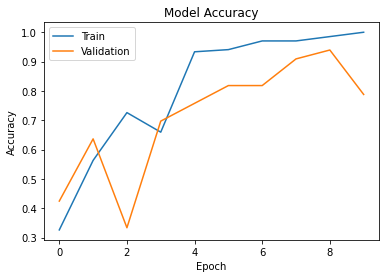

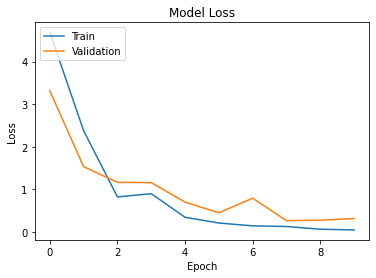

2/2 [==============================] - 6s 1s/step - loss: 0.3036 - accuracy: 0.9048
VGG19 Accuracy: 0.9047619104385376


In [4]:
# VGG19

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# paths to dataset
train_path = 'train'
test_path = 'test'

# image size and batch size
image_size = (224, 224)
batch_size = 32

# image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# number of classes
num_classes = 4

# loading pre-trained model without the fully connected layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freezing the pre-trained layers
for layer in vgg19_base.layers:
    layer.trainable = False

# adding new fully connected layers
vgg19_model = Sequential([
    vgg19_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# compiling the model
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the model
epochs = 10

vgg19_history = vgg19_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# plot the training and validation accuracy
plt.plot(vgg19_history.history['accuracy'])
plt.plot(vgg19_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(vgg19_history.history['loss'])
plt.plot(vgg19_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# evaluating the model
vgg19_score = vgg19_model.evaluate(test_generator)

# printing the accuracy
print('VGG19 Accuracy:', vgg19_score[1])


Found 135 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 42 images belonging to 4 classes.
Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 2.1178 - accuracy: 0.2667 - val_loss: 1.8940 - val_accuracy: 0.2424
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 1.6433 - accuracy: 0.2370 - val_loss: 1.3574 - val_accuracy: 0.2424
Epoch 3/10
5/5 [==============================] - 11s 3s/step - loss: 1.3965 - accuracy: 0.2444 - val_loss: 1.3624 - val_accuracy: 0.2727
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 1.4081 - accuracy: 0.2963 - val_loss: 1.3367 - val_accuracy: 0.3636
Epoch 5/10
5/5 [==============================] - 12s 2s/step - loss: 1.3628 - accuracy: 0.3037 - val_loss: 1.4912 - val_accuracy: 0.3030
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 1.5707 - accuracy: 0.2370 - val_loss: 1.3389 - val_accuracy: 0.2727
Epoch 7/10
5/5 [==============================] - 1

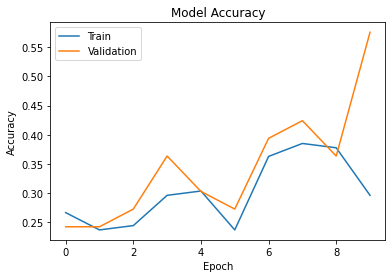

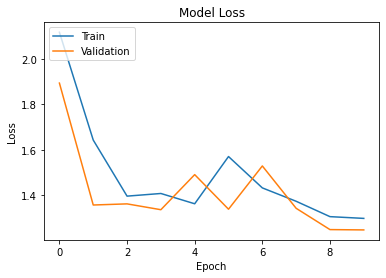

In [8]:
# resnet

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# paths to dataset
train_path = 'train'
test_path = 'test'

# image size and batch size
image_size = (224, 224)
batch_size = 32

# creating the image data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# number of classes
num_classes = 4

# Load pre-trained model without the fully connected layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the pre-trained layers
for layer in resnet_base.layers:
    layer.trainable = False

# adding new fully connected layers
resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# compiling the model
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# training epochs
epochs = 10

resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# evaluating the model
resnet_score = resnet_model.evaluate(test_generator)

# printing the accuracy
print('ResNet Accuracy:', resnet_score[1])

# plot the training and validation accuracy
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 135 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 42 images belonging to 4 classes.
Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 38.3127 - accuracy: 0.3481 - val_loss: 8.0743 - val_accuracy: 0.7576
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 7.4591 - accuracy: 0.6741 - val_loss: 4.6575 - val_accuracy: 0.7273
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 2.8395 - accuracy: 0.8444 - val_loss: 3.2822 - val_accuracy: 0.9394
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 1.2465 - accuracy: 0.8963 - val_loss: 2.2070 - val_accuracy: 0.9394
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.7235 - accuracy: 0.9407 - val_loss: 2.1129 - val_accuracy: 0.9091
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.3389 - accuracy: 0.9630 - val_loss: 2.1240 - val_accuracy: 0.9697
Epoch 7/10
5/5 [==============================] - 6s 1s

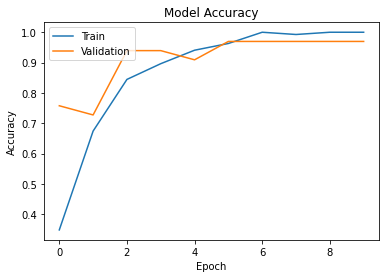

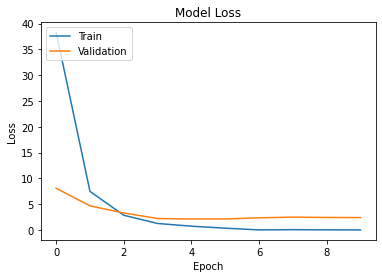

In [6]:
# inception

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# paths to dataset
train_path = 'train'
test_path = 'test'

# image size and batch size
image_size = (224, 224)
batch_size = 32

# creating the image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# number of classes
num_classes = 4

# loading pre-trained model without the fully connected layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freezing the pre-trained layers
for layer in inception_base.layers:
    layer.trainable = False

# adding new fully connected layers
inception_model = Sequential([
    inception_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# compiling the model
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training epochs
epochs = 10

inception_history = inception_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# evaluating the model
inception_score = inception_model.evaluate(test_generator)

# printing the accuracy
print('Inception Accuracy:', inception_score[1])

# plot the training and validation accuracy
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 135 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 42 images belonging to 4 classes.
Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 1.3766 - accuracy: 0.2667 - val_loss: 1.3113 - val_accuracy: 0.2424
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 1.2812 - accuracy: 0.4519 - val_loss: 1.0369 - val_accuracy: 0.5455
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 1.2266 - accuracy: 0.4148 - val_loss: 0.7972 - val_accuracy: 0.6364
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 1.2359 - accuracy: 0.4519 - val_loss: 0.8977 - val_accuracy: 0.6061
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 1.0403 - accuracy: 0.4963 - val_loss: 0.9544 - val_accuracy: 0.6061
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 1.0259 - accuracy: 0.4889 - val_loss: 0.8592 - val_accuracy: 0.5758
Epoch 7/10
5/5 [==============================] - 8s 2s/

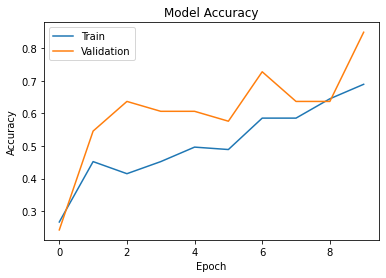

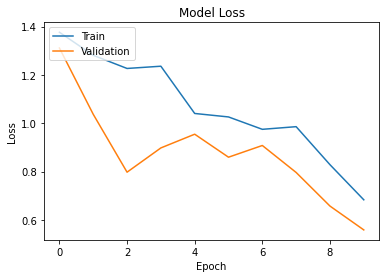

In [7]:
# AlexNet

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# paths to dataset
train_path = 'train'
test_path = 'test'

# image size and batch size
image_size = (224, 224)
batch_size = 32

# creating the image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# number of classes
num_classes = 4

# AlexNet model
alexnet_model = Sequential()
alexnet_model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Conv2D(256, kernel_size=(5, 5), padding="same", activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Conv2D(384, kernel_size=(3, 3), padding="same", activation='relu'))
alexnet_model.add(Conv2D(384, kernel_size=(3, 3), padding="same", activation='relu'))
alexnet_model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(num_classes, activation='softmax'))

# compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
alexnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# training the epochs
epochs = 10

alexnet_history = alexnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# evaluating the model
alexnet_score = alexnet_model.evaluate(test_generator)

# printing the accuracy
print('AlexNet Accuracy:', alexnet_score[1])

# plot the training and validation accuracy
plt.plot(alexnet_history.history['accuracy'])
plt.plot(alexnet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(alexnet_history.history['loss'])
plt.plot(alexnet_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

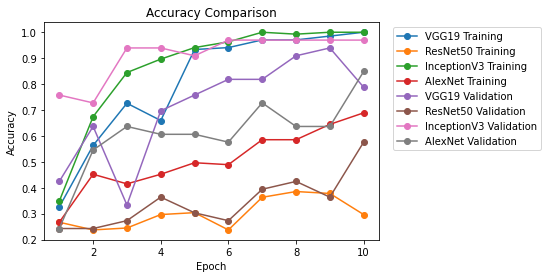

In [20]:
# accuracy 

import matplotlib.pyplot as plt

# Accuracy values for each epoch
vgg19_acc = vgg19_history.history['accuracy']
vgg19_val_acc = vgg19_history.history['val_accuracy']

resnet_acc = resnet_history.history['accuracy']
resnet_val_acc = resnet_history.history['val_accuracy']

inception_acc = inception_history.history['accuracy']
inception_val_acc = inception_history.history['val_accuracy']

alexnet_acc = alexnet_history.history['accuracy']
alexnet_val_acc = alexnet_history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(vgg19_acc) + 1)

# Plot the training accuracies
plt.plot(epochs, vgg19_acc, marker='o', label='VGG19 Training')
plt.plot(epochs, resnet_acc, marker='o', label='ResNet50 Training')
plt.plot(epochs, inception_acc, marker='o', label='InceptionV3 Training')
plt.plot(epochs, alexnet_acc, marker='o', label='AlexNet Training')

# Plot the validation accuracies
plt.plot(epochs, vgg19_val_acc, marker='o', label='VGG19 Validation')
plt.plot(epochs, resnet_val_acc, marker='o', label='ResNet50 Validation')
plt.plot(epochs, inception_val_acc, marker='o', label='InceptionV3 Validation')
plt.plot(epochs, alexnet_val_acc, marker='o', label='AlexNet Validation')

plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

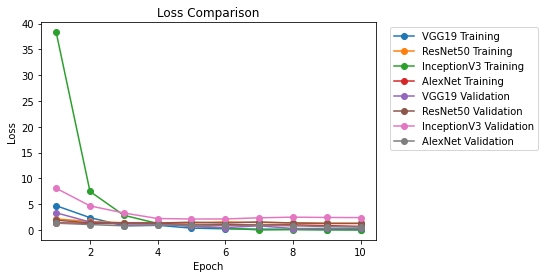

In [19]:
# loss

import matplotlib.pyplot as plt

# Loss values for each epoch
vgg19_loss = vgg19_history.history['loss']
vgg19_val_loss = vgg19_history.history['val_loss']

resnet_loss = resnet_history.history['loss']
resnet_val_loss = resnet_history.history['val_loss']

inception_loss = inception_history.history['loss']
inception_val_loss = inception_history.history['val_loss']

alexnet_loss = alexnet_history.history['loss']
alexnet_val_loss = alexnet_history.history['val_loss']

# Number of epochs
epochs = range(1, len(vgg19_loss) + 1)

# Plot the training losses
plt.plot(epochs, vgg19_loss, marker='o', label='VGG19 Training')
plt.plot(epochs, resnet_loss, marker='o', label='ResNet50 Training')
plt.plot(epochs, inception_loss, marker='o', label='InceptionV3 Training')
plt.plot(epochs, alexnet_loss, marker='o', label='AlexNet Training')

# Plot the validation losses
plt.plot(epochs, vgg19_val_loss, marker='o', label='VGG19 Validation')
plt.plot(epochs, resnet_val_loss, marker='o', label='ResNet50 Validation')
plt.plot(epochs, inception_val_loss, marker='o', label='InceptionV3 Validation')
plt.plot(epochs, alexnet_val_loss, marker='o', label='AlexNet Validation')

plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()